In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_transform_data(filepath):
    # Loading and transforming the World Bank dataset
    df_original = pd.read_csv(filepath, skiprows=4)
    df_transposed = df_original.set_index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']).transpose()
    df_transposed.reset_index(inplace=True)
    df_transposed.rename(columns={'index': 'Year'}, inplace=True)
    df_transposed['Year'] = pd.to_numeric(df_transposed['Year'], errors='coerce')
    return df_original, df_transposed

def extract_specific_data(df, countries, indicators, start_year, end_year):
    # Extracting data for specific countries, indicators, and years
    filtered_df = df[(df['Country Code'].isin(countries)) & (df['Indicator Code'].isin(indicators))]
    years = [str(year) for year in range(int(start_year), int(end_year) + 1)]
    return filtered_df[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'] + years]

# Define file path, countries, indicators, and year range
file_path = 'C:\\Users\\LENOVO\\Downloads\\API_19_DS2_en_csv_v2_5998250.csv'
countries = ['AFG', 'AFW']
indicators = ['SP.URB.TOTL', 'EN.ATM.CO2E.SF.ZS']
start_year = '2000'
end_year = '2010'

# Load and transform data
df_original, df_transposed = load_and_transform_data(file_path)

# Extract specific data
specific_data = extract_specific_data(df_original, countries, indicators, start_year, end_year)


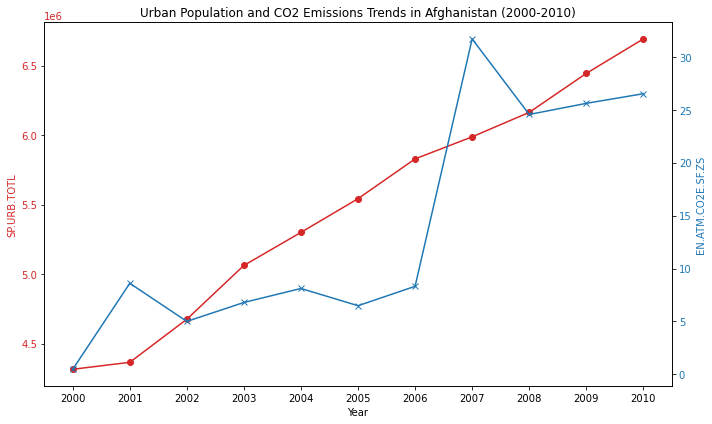

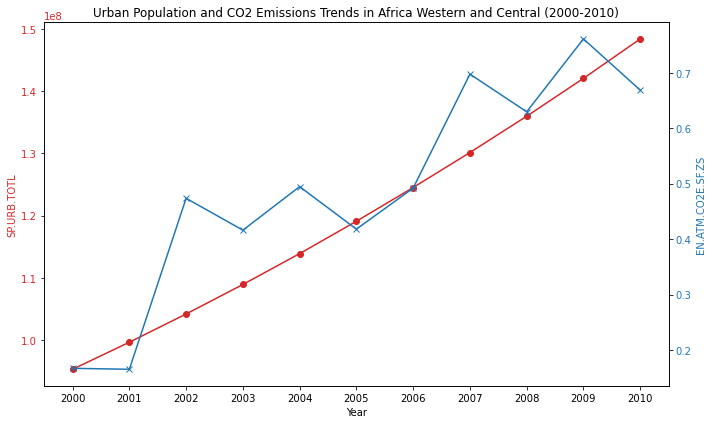

In [2]:
def plot_combined_trend(data, country_code, indicator1, indicator2, title):
    """
    Plots the trends of two indicators over time for a specific country on a single graph.
    """
    years = [str(year) for year in range(2000, 2011)]

    # Extracting data for the first indicator
    data_ind1 = data[(data['Country Code'] == country_code) & (data['Indicator Code'] == indicator1)]
    data_ind1 = data_ind1[years].apply(pd.to_numeric, errors='coerce').iloc[0]

    # Extracting data for the second indicator
    data_ind2 = data[(data['Country Code'] == country_code) & (data['Indicator Code'] == indicator2)]
    data_ind2 = data_ind2[years].apply(pd.to_numeric, errors='coerce').iloc[0]

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plotting the first indicator
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel(indicator1, color=color)
    ax1.plot(years, data_ind1, color=color, marker='o', label=indicator1)
    ax1.tick_params(axis='y', labelcolor=color)

    # Creating a second y-axis for the second indicator
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel(indicator2, color=color)
    ax2.plot(years, data_ind2, color=color, marker='x', label=indicator2)
    ax2.tick_params(axis='y', labelcolor=color)

    # Title and layout adjustments
    plt.title(title)
    fig.tight_layout()
    plt.show()

# Urban Population and CO2 Emissions Trend for Afghanistan
plot_combined_trend(specific_data, 'AFG', 'SP.URB.TOTL', 'EN.ATM.CO2E.SF.ZS', 'Urban Population and CO2 Emissions Trends in Afghanistan (2000-2010)')

# Urban Population and CO2 Emissions Trend for Africa Western and Central
plot_combined_trend(specific_data, 'AFW', 'SP.URB.TOTL', 'EN.ATM.CO2E.SF.ZS', 'Urban Population and CO2 Emissions Trends in Africa Western and Central (2000-2010)')


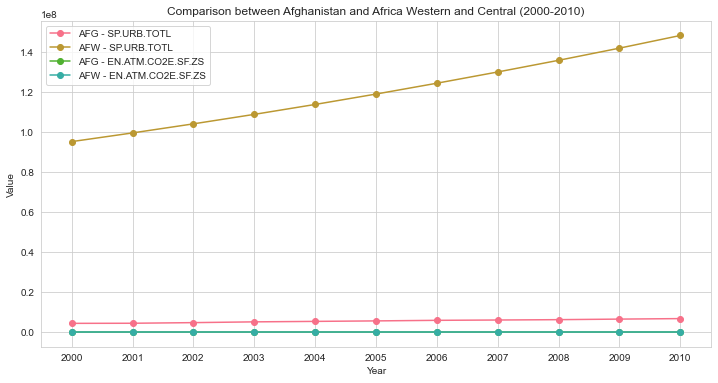

In [3]:
def plot_comparison(data, indicators, countries, title):
    plt.figure(figsize=(12, 6))
    sns.set_palette("husl")
    sns.set_style("whitegrid")
    for indicator in indicators:
        for country in countries:
            country_data = data[(data['Country Code'] == country) & (data['Indicator Code'] == indicator)]
            years = [str(year) for year in range(2000, 2011)]
            country_data = country_data[years].apply(pd.to_numeric, errors='coerce').iloc[0]
            plt.plot(years, country_data, marker='o', label=f"{country} - {indicator}")
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()
# Define file path, countries, indicators, and year range
file_path = 'path_to_your_dataset.csv'
countries = ['AFG', 'AFW']
indicators = ['SP.URB.TOTL', 'EN.ATM.CO2E.SF.ZS']
start_year = '2000'
end_year = '2010'


# Plot comparison between Afghanistan and Africa Western and Central
plot_comparison(specific_data, indicators, countries, 'Comparison between Afghanistan and Africa Western and Central (2000-2010)')

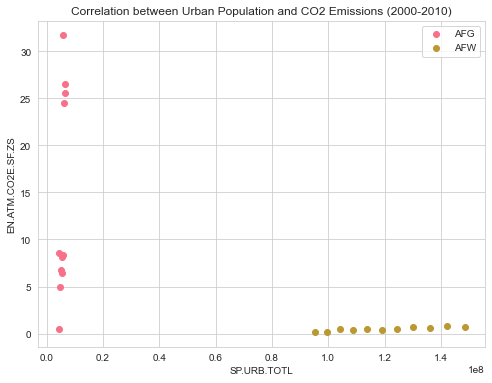

In [4]:
def plot_correlation(data, indicators, countries, title):
    plt.figure(figsize=(8, 6))
    sns.set_style("whitegrid")
    
    for country in countries:
        country_data = data[(data['Country Code'] == country)]
        years = [str(year) for year in range(2000, 2011)]
        urban_population = country_data[country_data['Indicator Code'] == indicators[0]][years].apply(pd.to_numeric, errors='coerce').iloc[0]
        co2_emissions = country_data[country_data['Indicator Code'] == indicators[1]][years].apply(pd.to_numeric, errors='coerce').iloc[0]
        plt.scatter(urban_population, co2_emissions, label=f"{country}")
    
    plt.title(title)
    plt.xlabel(indicators[0])
    plt.ylabel(indicators[1])
    plt.legend()
    plt.grid(True)
    plt.show()
# Plot correlation between urban population and CO2 emissions
plot_correlation(specific_data, indicators, countries, 'Correlation between Urban Population and CO2 Emissions (2000-2010)')

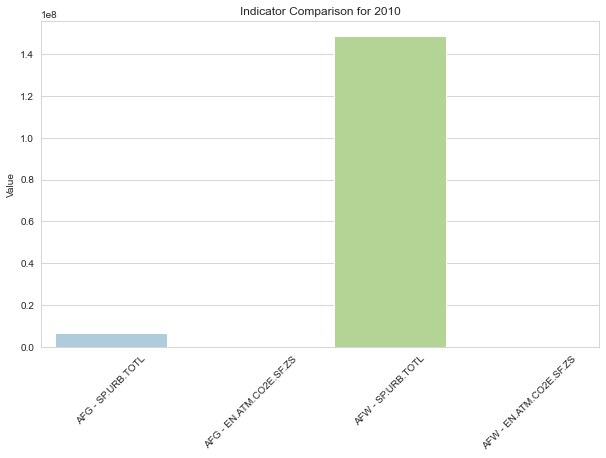

In [9]:
def bar_chart_comparison(data, indicators, countries, year, title):
    plt.figure(figsize=(10, 6))
    sns.set_palette("Paired")
    sns.set_style("whitegrid")

    values = []
    labels = []
    for country in countries:
        for indicator in indicators:
            value = data[(data['Country Code'] == country) & (data['Indicator Code'] == indicator)][year].values[0]
            values.append(value)
            labels.append(f"{country} - {indicator}")
    
    sns.barplot(x=labels, y=values)
    plt.title(title)
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.show()

# Bar chart for the year 2010
bar_chart_comparison(specific_data, indicators, countries, '2010', 'Indicator Comparison for 2010')


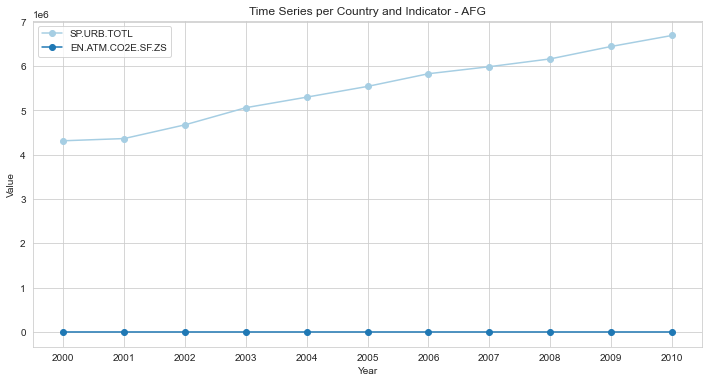

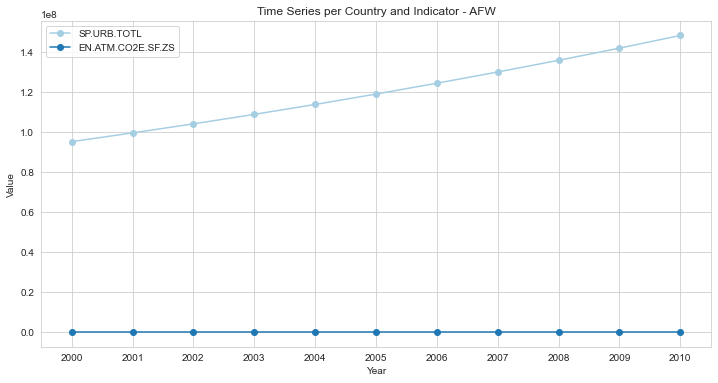

In [6]:
def plot_time_series_per_country(data, countries, indicators, title):
    years = [str(year) for year in range(2000, 2011)]

    for country in countries:
        plt.figure(figsize=(12, 6))
        for indicator in indicators:
            country_data = data[(data['Country Code'] == country) & (data['Indicator Code'] == indicator)]
            values = country_data[years].apply(pd.to_numeric, errors='coerce').iloc[0]
            plt.plot(years, values, marker='o', label=indicator)
        plt.title(f"{title} - {country}")
        plt.xlabel('Year')
        plt.ylabel('Value')
        plt.legend()
        plt.grid(True)
        plt.show()

# Time series for each country
plot_time_series_per_country(specific_data, countries, indicators, 'Time Series per Country and Indicator')


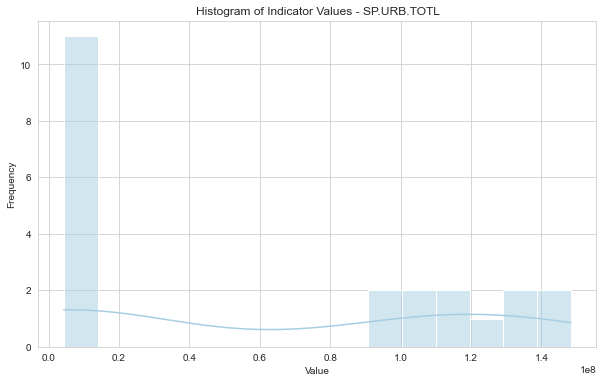

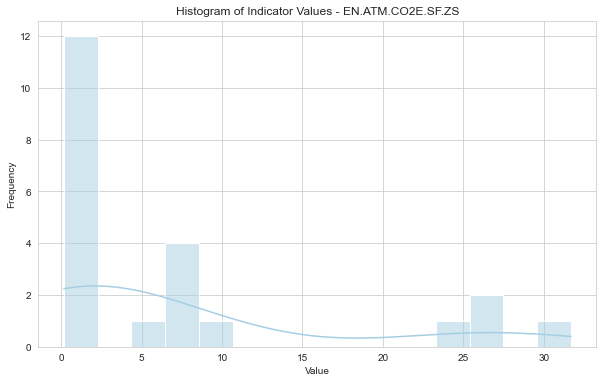

In [7]:
def plot_histograms(data, indicators, title):
    years = [str(year) for year in range(2000, 2011)]
    
    for indicator in indicators:
        plt.figure(figsize=(10, 6))
        all_values = []
        for year in years:
            values = data[data['Indicator Code'] == indicator][year].apply(pd.to_numeric, errors='coerce')
            all_values.extend(values)

        sns.histplot(all_values, bins=15, kde=True)
        plt.title(f"{title} - {indicator}")
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Histograms for each indicator
plot_histograms(specific_data, indicators, 'Histogram of Indicator Values')
